## K-Means clustering

In [1]:
import pandas as pd
#testing

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [ ]:
df_final = pd.read_csv("/Users/femke/Documents/Uni/DSS/Thesis/Data/ml1m_df_final.csv")
df_final = df_final.drop(columns=["Title"])

In [ ]:
# Scaling the variables
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_final)

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

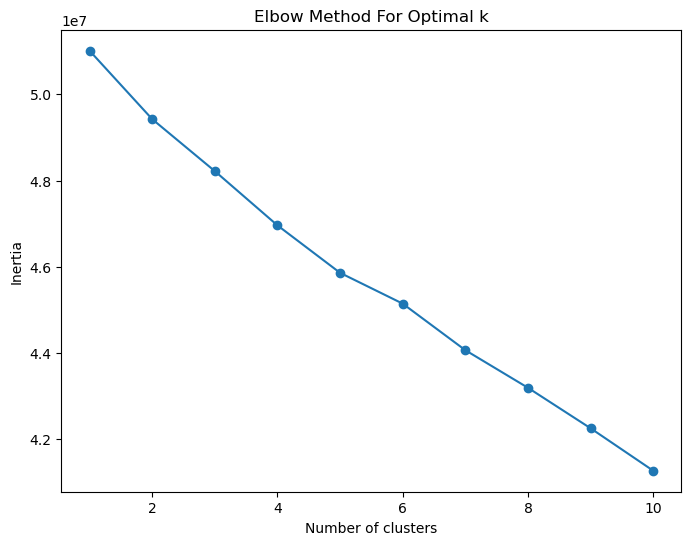

In [ ]:
# Determine the range of clusters to evaluate
cluster_range = range(1, 11)
inertia = []

# Calculate the within-cluster sum of squares for each number of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the results to find the elbow point
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:

# Scale the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_final)

# Determine the range of clusters to evaluate
cluster_range = range(2, 21)  # Silhouette score isn't meaningful for a single cluster
inertia = []
silhouette_avg = []

# Calculate the within-cluster sum of squares and silhouette score for each number of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_avg.append(silhouette_score(df_scaled, kmeans.labels_))

# Plot the results to find the elbow point and silhouette score
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(cluster_range, inertia, 'g-')
ax2.plot(cluster_range, silhouette_avg, 'b-')

ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia', color='g')
ax2.set_ylabel('Silhouette Score', color='b')

plt.title('Elbow Method and Silhouette Score For Optimal k')
plt.show()

KeyboardInterrupt: 

In [ ]:
# Set clusters based on Elbow method and silhouette score ^^
optimal_k = 5

# Create and fit the KMeans model
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(df_scaled)

# Assign clusters to your dataframe
df_final['cluster'] = kmeans.labels_

In [ ]:
# Check the first few rows with cluster labels
print(df_final.head())

In [ ]:
# Optional: analyze the size and characteristics of each cluster
cluster_summary = df_final.groupby('cluster').mean()
print(cluster_summary)

## Hierarcical clustering

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df_final = pd.read_csv("/Users/femke/Documents/Uni/DSS/Thesis/Data/ml1m_df_final.csv")
df_final = df_final.drop(columns=["Title"])

In [ ]:
# Scale the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_final)

# Determine the range of clusters to evaluate
cluster_range = range(1, 11)
linkage_matrix = linkage(df_scaled, method='ward')

# Calculate the within-cluster sum of squares for each number of clusters
inertia = []
for k in cluster_range:
    clusters = fcluster(linkage_matrix, k, criterion='maxclust')
    inertia.append(np.sum(np.min(linkage_matrix[:, 2], axis=0)))

# Plot the results to find the elbow point
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
